# Effekt der JPEG-Bildkompression bewertet mit Maximum Likelihood Difference Scaling (MLDS) 
## Guillermo Aguilar
### Seminar: Visuelle Wahrnehmung beim Menschen und Bildqualität - WiSe 2020/21
*Dies ist nur eine **minimale** Beispieldokumentation, sie soll Ihnen eine Vorstellung davon geben, wie Sie Ihre Dokumentation strukturieren können. Wenn Sie mehr Bedingungen oder Bildmanipulationen, mehr Stimuli und mehr Ergebnisse zu zeigen haben, sollten Sie sie natürlich entsprechend erweitern. Behalten Sie aber die gleiche Gesamtstruktur bei.*

In [143]:
from PIL import Image # Pillow image library
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


# I use the module *pandas* to read csv files, and the 
# module *seaborn* for nice plotting defaults. 
# You don't have to necessarily use these modules but 
# I recommend you anyway to learn them if you don't know them yet.
import pandas as pd
import seaborn as sns
sns.set_style('ticks')
sns.set_context('talk')

## 1. Einleitung

Die Komprimierung von Bildern kann sich spürbar auf die wahrgenommene Bildqualität auswirken, besonders wenn wir eine hohe Komprimierungsstufe anwenden. Unsere Forschungsfrage war, ob menschliche Beobachter für verschiedene Bilder unterschiedlich emfindlich auf die Qualitätsverluste durch Komprimierung reagieren. Um die Frage zu testen, haben wir natürliche Gesichter und abstrakte Gesichter verglichen. Wir haben die Empfindlichkeit für die Komprimierung mit Wahrnehmungsskalen (Maximum Likelihood Difference Scaling, MLDS) für verschiedene Grade der JPEG-Kompression gemessen. Unser Ansatz war ähnlich als die Arbeit von Charrier et al. (2007).
Wir haben die folgenden Hypothesen getestet: Wenn die Bildkomprimierung, d.h. die Reduktion der Dateigröße, mit dem visuellen Inhalt interagiert, dann sollten sich die Wahrnehmungsskalen zwischen den Bildern unterscheiden.

 

## 2. Experimentelles Design

Wir haben jeweils 1 Bild für unsere beiden Bildkategorien getestet, *Einsteins* Porträt als natürliches Bild und Picasso's Women als abstraktes Bild.  Für jedes der Bilder haben wir 7 Stufen der JPG-Kompression angewendet mit den *Qualitäts*-Parameterwerten 0, 5, 10, 20, 40, 60, 80, 100 unter Verwendung der *PIL*-Bibliothek für Python (der Qualitätsparameter reicht von 0 bis 100). Die 0 entspricht dem ursprünglichen, unveränderten *Einstein*-Bild. 

Zur besseren Veranschaulichung der Bildmanipulation haben wir die JPEG-Qualitätswerte in *Verzerrungswerte* umgerechnet, definiert als *Verzerrung = (100 - Qualität)*. Die folgende Abbildung zeigt den kompletten Satz der im Experiment verwendeten Stimuli.


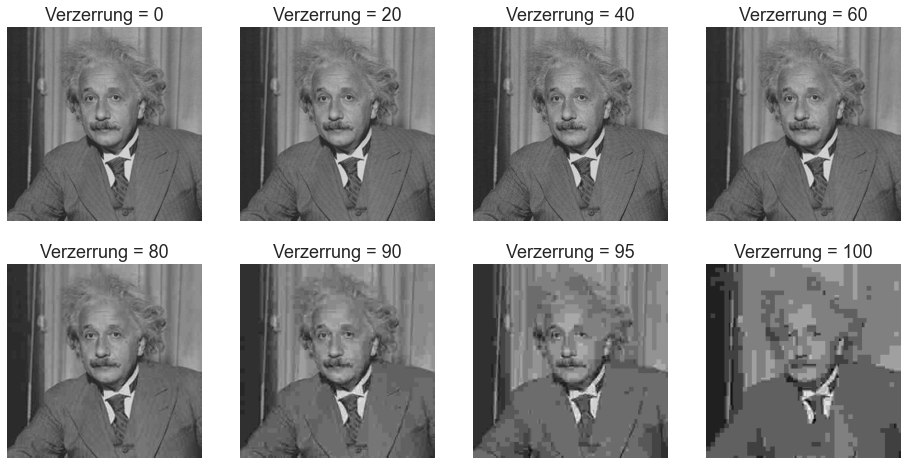

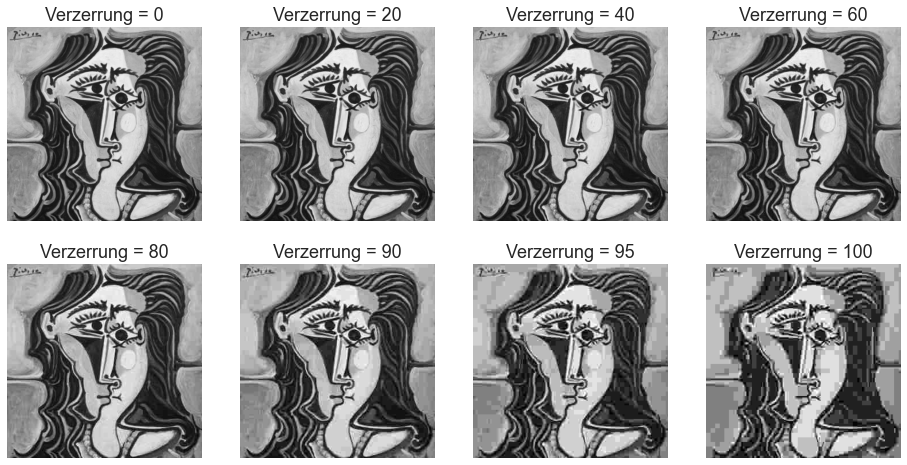

In [144]:
quality = [100, 80, 60, 40, 20, 10, 5, 0]
degradation = 100 - np.array(quality)

plt.figure(figsize=(16, 8))
for i, q in enumerate(quality):
    im = np.array(Image.open('stimuli/einstein_%d.jpg' % q).convert('L'))
    plt.subplot(2, 4, i+1)
    plt.imshow(im, cmap='gray', vmin=0, vmax=255); 
    plt.axis('off')
    plt.title('Verzerrung = %d' % (100-q))
    
plt.figure(figsize=(16, 8))
for i, q in enumerate(quality):
    im = np.array(Image.open('stimuli/picasso_%d.jpg' % q).convert('L'))
    plt.subplot(2, 4, i+1)
    plt.imshow(im, cmap='gray', vmin=0, vmax=255); 
    plt.axis('off')
    plt.title('Verzerrung = %d' % (100-q))  

Wir haben Wahrnehmungsskalen mittels MLDS mit der Methode der Triaden gemessen. Da wir 8 Komprimierungsstufen verwendet haben, ergaben sich insgesamt ${8 \choose 3}= 56$ mögliche Triadenkombinationen, die wir $5$ mal wiederholt haben. Daraus ergeben sich insgesamt 280 Durchgänge pro Beobachter und Bild und 560 Durchgänge für beide Bilder. Wir haben 2 Beobachter getestet. Das Experiment hat ingesamt 1 Stunde gedauert, die Beobachter konnten zwischendurch Pausen machen.  

## 3. Ergebnisse

Die folgende Abbildung zeigt die Wahrnehmungsskalen für unsere Stimuli und zwei Beobachter (der Autor und ein naiver Teilnehmer). Wir haben das Maximum der Skala in Anlehnung an Charrier et al. (2007) auf eins normiert.
Die Skalen der beiden Beobachter weisen geringfügige Unterschiede auf. Für beide Beobachter ist aber festzustellen, dass der Effekt der Komprimierung in dem natürlichen (Einstein) Gesicht eher bemerkt wird als in dem abstrakten Gesicht (Picasso). Der Wendepunkt der Skala für Einstein ist bei einem niedrigeren Komprimierungswert als der der Skala bei Picassos Bild. 

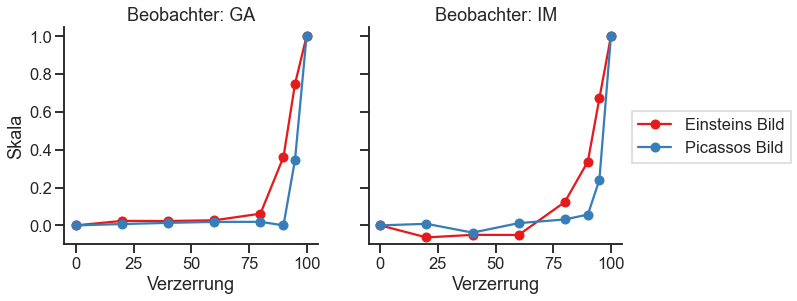

In [145]:
# (I analyzed the data in R using the MLDS package, and save the scale as a csv.
# then here I use pandas to read the csv file. You can use pandas but you don't *have* to. 
# I use it because I'm used to it.)

# reading scales and normalizing
df = pd.read_csv('ga_einstein_scale.csv')
scale_einstein_ga = df['x']/df['x'].max()

df = pd.read_csv('im_einstein_scale.csv')
scale_einstein_im = df['x']/df['x'].max()

df = pd.read_csv('ga_picasso_scale.csv')
scale_picasso_ga = df['x']/df['x'].max()

df = pd.read_csv('im_picasso_scale.csv')
scale_picasso_im = df['x']/df['x'].max()

# color palette definition, taken from ColorBrewer
palette = {'Einstein':'#e41a1c', 'Picasso': '#377eb8'}

# Ergebnisse pro Beobachter
plt.figure(figsize=(10,4))
ax = plt.subplot(1,2,1)
plt.plot(degradation, scale_einstein_ga, 'o-', c=palette['Einstein'])
plt.plot(degradation, scale_picasso_ga, 'o-', c=palette['Picasso'])
plt.ylabel('Skala')
plt.xlabel('Verzerrung')
plt.ylim(-0.1, 1.05)
plt.title('Beobachter: GA')
sns.despine()

ax = plt.subplot(1,2,2)
plt.plot(degradation, scale_einstein_im, 'o-', label='Einsteins Bild', c=palette['Einstein'])
plt.plot(degradation, scale_picasso_im, 'o-', label='Picassos Bild', c=palette['Picasso'])
plt.xlabel('Verzerrung')
plt.ylim(-0.1, 1.05)
ax.set_yticklabels([])
plt.title('Beobachter: IM')
ax.legend(loc='upper center', bbox_to_anchor=(1.35, 0.65),
          fancybox=False, shadow=False)
sns.despine()


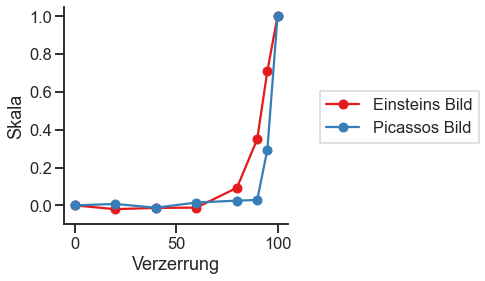

In [146]:
# Berechnung von Durschnittskalen
avg_einstein_scale = np.mean(np.vstack((scale_einstein_ga.values, scale_einstein_im.values)), axis=0)
avg_picasso_scale = np.mean(np.vstack((scale_picasso_ga.values, scale_picasso_im.values)), axis=0)

fig = plt.figure(figsize=(4, 4))
ax = plt.subplot(1,1,1)
plt.plot(degradation, avg_einstein_scale, 'o-', label='Einsteins Bild', c=palette['Einstein'])
plt.plot(degradation, avg_picasso_scale, 'o-', label='Picassos Bild', c=palette['Picasso'])
plt.xlabel('Verzerrung')
plt.ylabel('Skala')
plt.ylim(-0.1, 1.05)
ax.legend(loc='upper center', bbox_to_anchor=(1.5, 0.65),
          fancybox=False, shadow=False)
sns.despine()


### Qualitative Beobachtungen
Die Beobachter berichten, dass die Komprimierung im Einstein Bild sowohl im Gesicht als auch im Hintergrund sichtbar waren, während in dem Bild von Picasso der Effekt der Komprimierung zuerst im Hintergrund wahrnehmbar war.


## 4. Diskussion

Wir stellen fest, dass die Wahrnehmungsskalen für beide Beobachter flach (oder leicht negativ) sind bis zu einem Verzerrung von 60 - 80 (Qualität von 20 - 40). Die Flachheit der Skala in diesem Bereich deutet darauf hin, dass die wahrgenommene Verschlechterung der Bildqualität nicht spürbar ist. Bei Degradationswerten höher als 60 - 80 (Qualität niedriger als 20 - 40) steigen die Wahrnehmungsskalen monoton an, was darauf hinweist, dass die Bildqualität abnimmt und dies von den Beobachtern wahrgenommen wird. Diese Ergebnisse stimmen mit unserem informellen subjektiven Eindruck von Qualitätsverschlechterung überein, wenn man die erste Abbildung oben betrachtet.

### Mögliche Probleme 
Eine klare Einschränkung in unserer Arbeit ist die Tatsache, dass wir eine begrenzte Anzahl von Stimuli verwendet haben. Wir haben nur ein Bild pro Kategorie verwendet, wir haben die Wahrnehmungsskalen für nur zwei Beobachter gemessen. 

### Offene Fragen
Da wir einen Unterschied in Abängigkeit vom Bildmaterial gefunden haben, stellt sich nun die Frage, wie sich die Komprimierung auf andere Arten von Bildern (z. B. Landschaften, Kunstwerke) auswirkt. Eine weitere Frage betrifft die Variabilität zwischen den Beobachtern. Es müsste eine grössere Anzahl von Teilnehmern untersucht werden.

### Referenzen
Charrier et al. (2007). Maximum likelihood difference scaling of image quality in compression-degraded images. JOSA 24 (11): 3418-26
